# **Capstone Project: UK House Sales Analysis for 2021**

*Author: (Aibek Abasov)*

**About Dataset**

This dataset captures detailed information about real estate transactions across various towns. Each row represents a single property transaction with multiple attributes describing the property and the transaction details. Below is an explanation of each column present in the dataset:

* **List Year (numeric data):** This column indicates the year in which the
property was listed for sale. It is a numeric field, typically representing the year in four digits (e.g., 2021).

* **Town (text data):** This column contains the name of the town where the property is located. It is a text field with town names such as "Fairfield," "Bloomfield," etc.

* **Address (text data):** This column provides the full street address of the property. It is a text field that includes details such as street number, street name, and unit number if applicable.

* **Assessed Value (numeric data):** This column represents the assessed value of the property. It is a numeric field indicating the value assigned to the property by the local government for taxation purposes. This value is used to calculate property taxes.

* **Sale Amount (numeric data):** This column indicates the actual sale amount of the property. It is a numeric field representing the price at which the property was sold.

* **Sales Ratio (numeric data):** This column shows the sales ratio, which is calculated as the sale amount divided by the assessed value. It is a numeric field that helps in understanding how the sale price compares to the assessed value.

* **Property Type (text data):** This column describes the type of property. It is a text field with categories such as "Residential," indicating that the property is used for residential purposes.

* **Residential Type (text data):** This column provides additional details about the residential property type. It is a text field with categories like "Single Family," "Condo," or "Two Family," specifying the nature of the residential unit.

Upload the dataset. Show first 5 rows.

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import the data file

In [250]:
houses = pd.read_excel('/Users/admin/Downloads/houses.xlsx')

Give brief information about the dataset

In [252]:
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   List Year         2469 non-null   int64  
 1   Town              2469 non-null   object 
 2   Address           2469 non-null   object 
 3   Assessed Value    2469 non-null   int64  
 4   Sale Amount       2469 non-null   float64
 5   Sales Ratio       2469 non-null   float64
 6   Property Type     2469 non-null   object 
 7   Residential Type  2272 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 154.4+ KB
None


Remove the Year column since the data value is all same for this column and it is 2021.

In [254]:
df = houses.drop('List Year', axis=1)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Town              2469 non-null   object 
 1   Address           2469 non-null   object 
 2   Assessed Value    2469 non-null   int64  
 3   Sale Amount       2469 non-null   float64
 4   Sales Ratio       2469 non-null   float64
 5   Property Type     2469 non-null   object 
 6   Residential Type  2272 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 135.2+ KB
None


Check if the datatype of Assessed Value and Sale Amount is integer, if not, convert the columns to integer value. In the same manner, check if Sales Ratio is float integer.

In [259]:
df['Sale Amount'] = df['Sale Amount'].astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Town              2469 non-null   object 
 1   Address           2469 non-null   object 
 2   Assessed Value    2469 non-null   int64  
 3   Sale Amount       2469 non-null   int64  
 4   Sales Ratio       2469 non-null   float64
 5   Property Type     2469 non-null   object 
 6   Residential Type  2272 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 135.2+ KB
None


Using Statistics module, calculate the mean and median of both Sale Amount and Sales Ratio column. Save mean value of Sale amount as ***mean_price*** variable.

In [262]:
mean_price = df['Sale Amount'].mean()
mean_sales_ratio = df['Sales Ratio'].mean()

print("Sale Amount Mean:", mean_price)
print("Sales Ratio Mean:", mean_sales_ratio)

median_price = df['Sale Amount'].median()
median_sales_ratio = df['Sales Ratio'].median()

print("Sale Amount Median:", median_price)
print("Sales Ratio Median:", median_sales_ratio)

Sale Amount Mean: 472617.20899149455
Sales Ratio Mean: 0.5853752601494532
Sale Amount Median: 310000.0
Sales Ratio Median: 0.5212


Now use mean_price variable. Create a new column. Name it Price Category. Using loop, populate your column with following criteria:
*   if *sales_amount<= 0.75(mean_price)* then it is Affordable
*   if *0.75(mean_price)<sales_amount<= 1.25(mean_price)* then it is Average
*   if *sales_amount> 1.25(mean_price)* then it is Expensive


In [265]:
df['Price Category'] = ''

for i in range(len(df)):
    sale = df.loc[i, 'Sale Amount']
    if sale <= 0.75 * mean_price:
        df.loc[i, 'Price Category'] = 'Affordable'
    elif 0.75 * mean_price < sale <= 1.25 * mean_price:
        df.loc[i, 'Price Category'] = 'Average'
    elif sale > 1.25 * mean_price:
        df.loc[i, 'Price Category'] = 'Expensive'

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Town              2469 non-null   object 
 1   Address           2469 non-null   object 
 2   Assessed Value    2469 non-null   int64  
 3   Sale Amount       2469 non-null   int64  
 4   Sales Ratio       2469 non-null   float64
 5   Property Type     2469 non-null   object 
 6   Residential Type  2272 non-null   object 
 7   Price Category    2469 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 154.4+ KB
None


Create a function which calculates annual tax for each house and prints it. Assuming that annual tax for the house is 1.5%, print the Sale Amount value and Annual tax for first 20 houses in your list.

In [267]:


def annual_tax(df):
    df['Annual Tax'] = df['Sale Amount'] * 0.015

    print(df[['Sale Amount', 'Annual Tax']])

annual_tax(df.head(20))

    Sale Amount  Annual Tax
0        220395       3,306
1        150000       2,250
2         68000       1,020
3         30000         450
4         25000         375
5        150000       2,250
6        140000       2,100
7        155000       2,325
8        139900       2,098
9        180000       2,700
10      1600000      24,000
11       615000       9,225
12      1055000      15,825
13       320000       4,800
14       514085       7,711
15       396000       5,940
16       620000       9,300
17       176000       2,640
18       599000       8,985
19       295000       4,425


/var/folders/4l/qrhpvhyj78b2ll5k61pyppb80000gn/T/ipykernel_3240/1452360107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Annual Tax'] = df['Sale Amount'] * 0.015


Count how many missing values you have in the Residential Type column

In [271]:
res_nan_count = df['Residential Type'].isnull().sum()

print(res_nan_count)

197


Populate the missing values in Residential Type with following values from Property Type:
*   if it is Apartments then fill with Apartment
*   if it is Commercial then fill with Business Building
*   if it is Industrial then fill with Industry Building
*   if it is Vacant Land then fill with Land



In [274]:
df.loc[(df['Residential Type'].isnull()) & (df['Property Type'] == "Apartments"), 'Residential Type'] = 'Apartment'
df.loc[(df['Residential Type'].isnull()) & (df['Property Type'] == "Commercial"), 'Residential Type'] = 'Business Building'
df.loc[(df['Residential Type'].isnull()) & (df['Property Type'] == "Industrial"), 'Residential Type'] = 'Industry Building'
df.loc[(df['Residential Type'].isnull()) & (df['Property Type'] == "Vacant Land"), 'Residential Type'] = 'Land'

print(df['Residential Type'].head(20))

0              Land
1              Land
2              Land
3              Land
4              Land
5              Land
6             Condo
7             Condo
8             Condo
9     Single Family
10        Apartment
11    Single Family
12    Single Family
13            Condo
14    Single Family
15    Single Family
16    Single Family
17    Single Family
18    Single Family
19    Single Family
Name: Residential Type, dtype: object


Check your dataset if any missing value remains

In [277]:
print(df.isnull().sum())

Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Price Category      0
dtype: int64


Create a class named Property with attributes for List Year (deafult=2021), Town, Address, Assessed Value, Sale Amount, Sales Ratio, Property Type, and Residential Type. Add methods to the Property class to display the property details. Create 20 objects using this class from the dataset with loop method.

In [280]:
class Property:
    def __init__(self, town, address, assessed_value, sale_amount, sales_ratio,
                 property_type, residential_type, list_year=2021):
        self.list_year = list_year
        self.town = town
        self.address = address
        self.assessed_value = assessed_value
        self.sale_amount = sale_amount
        self.sales_ratio = sales_ratio
        self.property_type = property_type
        self.residential_type = residential_type

    def display_details(self):
        print(f"Year Listed: {self.list_year}")
        print(f"Town: {self.town}")
        print(f"Address: {self.address}")
        print(f"Assessed Value: ${self.assessed_value}")
        print(f"Sale Amount: ${self.sale_amount}")
        print(f"Sales Ratio: {self.sales_ratio}")
        print(f"Property Type: {self.property_type}")
        print(f"Residential Type: {self.residential_type}")
        print("-" * 40)

property_list = []

for i in range(20):
    row = df.iloc[i]
    p = Property(
        town=row['Town'],
        address=row['Address'],
        assessed_value=row['Assessed Value'],
        sale_amount=row['Sale Amount'],
        sales_ratio=row['Sales Ratio'],
        property_type=row['Property Type'],
        residential_type=row['Residential Type']
    )
    property_list.append(p)

for prop in property_list:
    prop.display_details()

Year Listed: 2021
Town: Canaan
Address: 0 ASPEN HILL DR
Assessed Value: $183800
Sale Amount: $220395
Sales Ratio: 0.833957213
Property Type: Vacant Land
Residential Type: Land
----------------------------------------
Year Listed: 2021
Town: Naugatuck
Address: 0 BRIDGE STREET
Assessed Value: $92690
Sale Amount: $150000
Sales Ratio: 0.6179
Property Type: Vacant Land
Residential Type: Land
----------------------------------------
Year Listed: 2021
Town: Canterbury
Address: 0 MILLER RD
Assessed Value: $46400
Sale Amount: $68000
Sales Ratio: 0.6823
Property Type: Vacant Land
Residential Type: Land
----------------------------------------
Year Listed: 2021
Town: Naugatuck
Address: 0 MISTYWOOD
Assessed Value: $40710
Sale Amount: $30000
Sales Ratio: 1.357
Property Type: Vacant Land
Residential Type: Land
----------------------------------------
Year Listed: 2021
Town: Naugatuck
Address: 0 SHERMAN STREET
Assessed Value: $35940
Sale Amount: $25000
Sales Ratio: 1.4376
Property Type: Vacant Land
R

Using group-by method, find average house price (Sale Amount) for each property type.

In [283]:
average_house_price = df.groupby('Property Type').agg(
    avrg_price=('Sale Amount', 'mean')
)

pd.set_option('display.float_format', '{:,.0f}'.format)

print(average_house_price)

               avrg_price
Property Type            
Apartments      2,182,222
Commercial      1,400,683
Industrial        554,444
Residential       436,023
Vacant Land       216,638


Using count method, count how many houses are sold in each city.

In [286]:
houses_count_by_towns = df.groupby('Town').agg(
    count=('Property Type', 'count')
)

print(houses_count_by_towns)

               count
Town                
Ansonia           20
Avon              46
Barkhamsted        8
Berlin            43
Bethany           11
...              ...
Morris             8
Naugatuck         59
New Britain      106
New Canaan        54
New Fairfield     37

[69 rows x 1 columns]


Create a bar chart showing the average Sale Amount for each town using Matplotlib

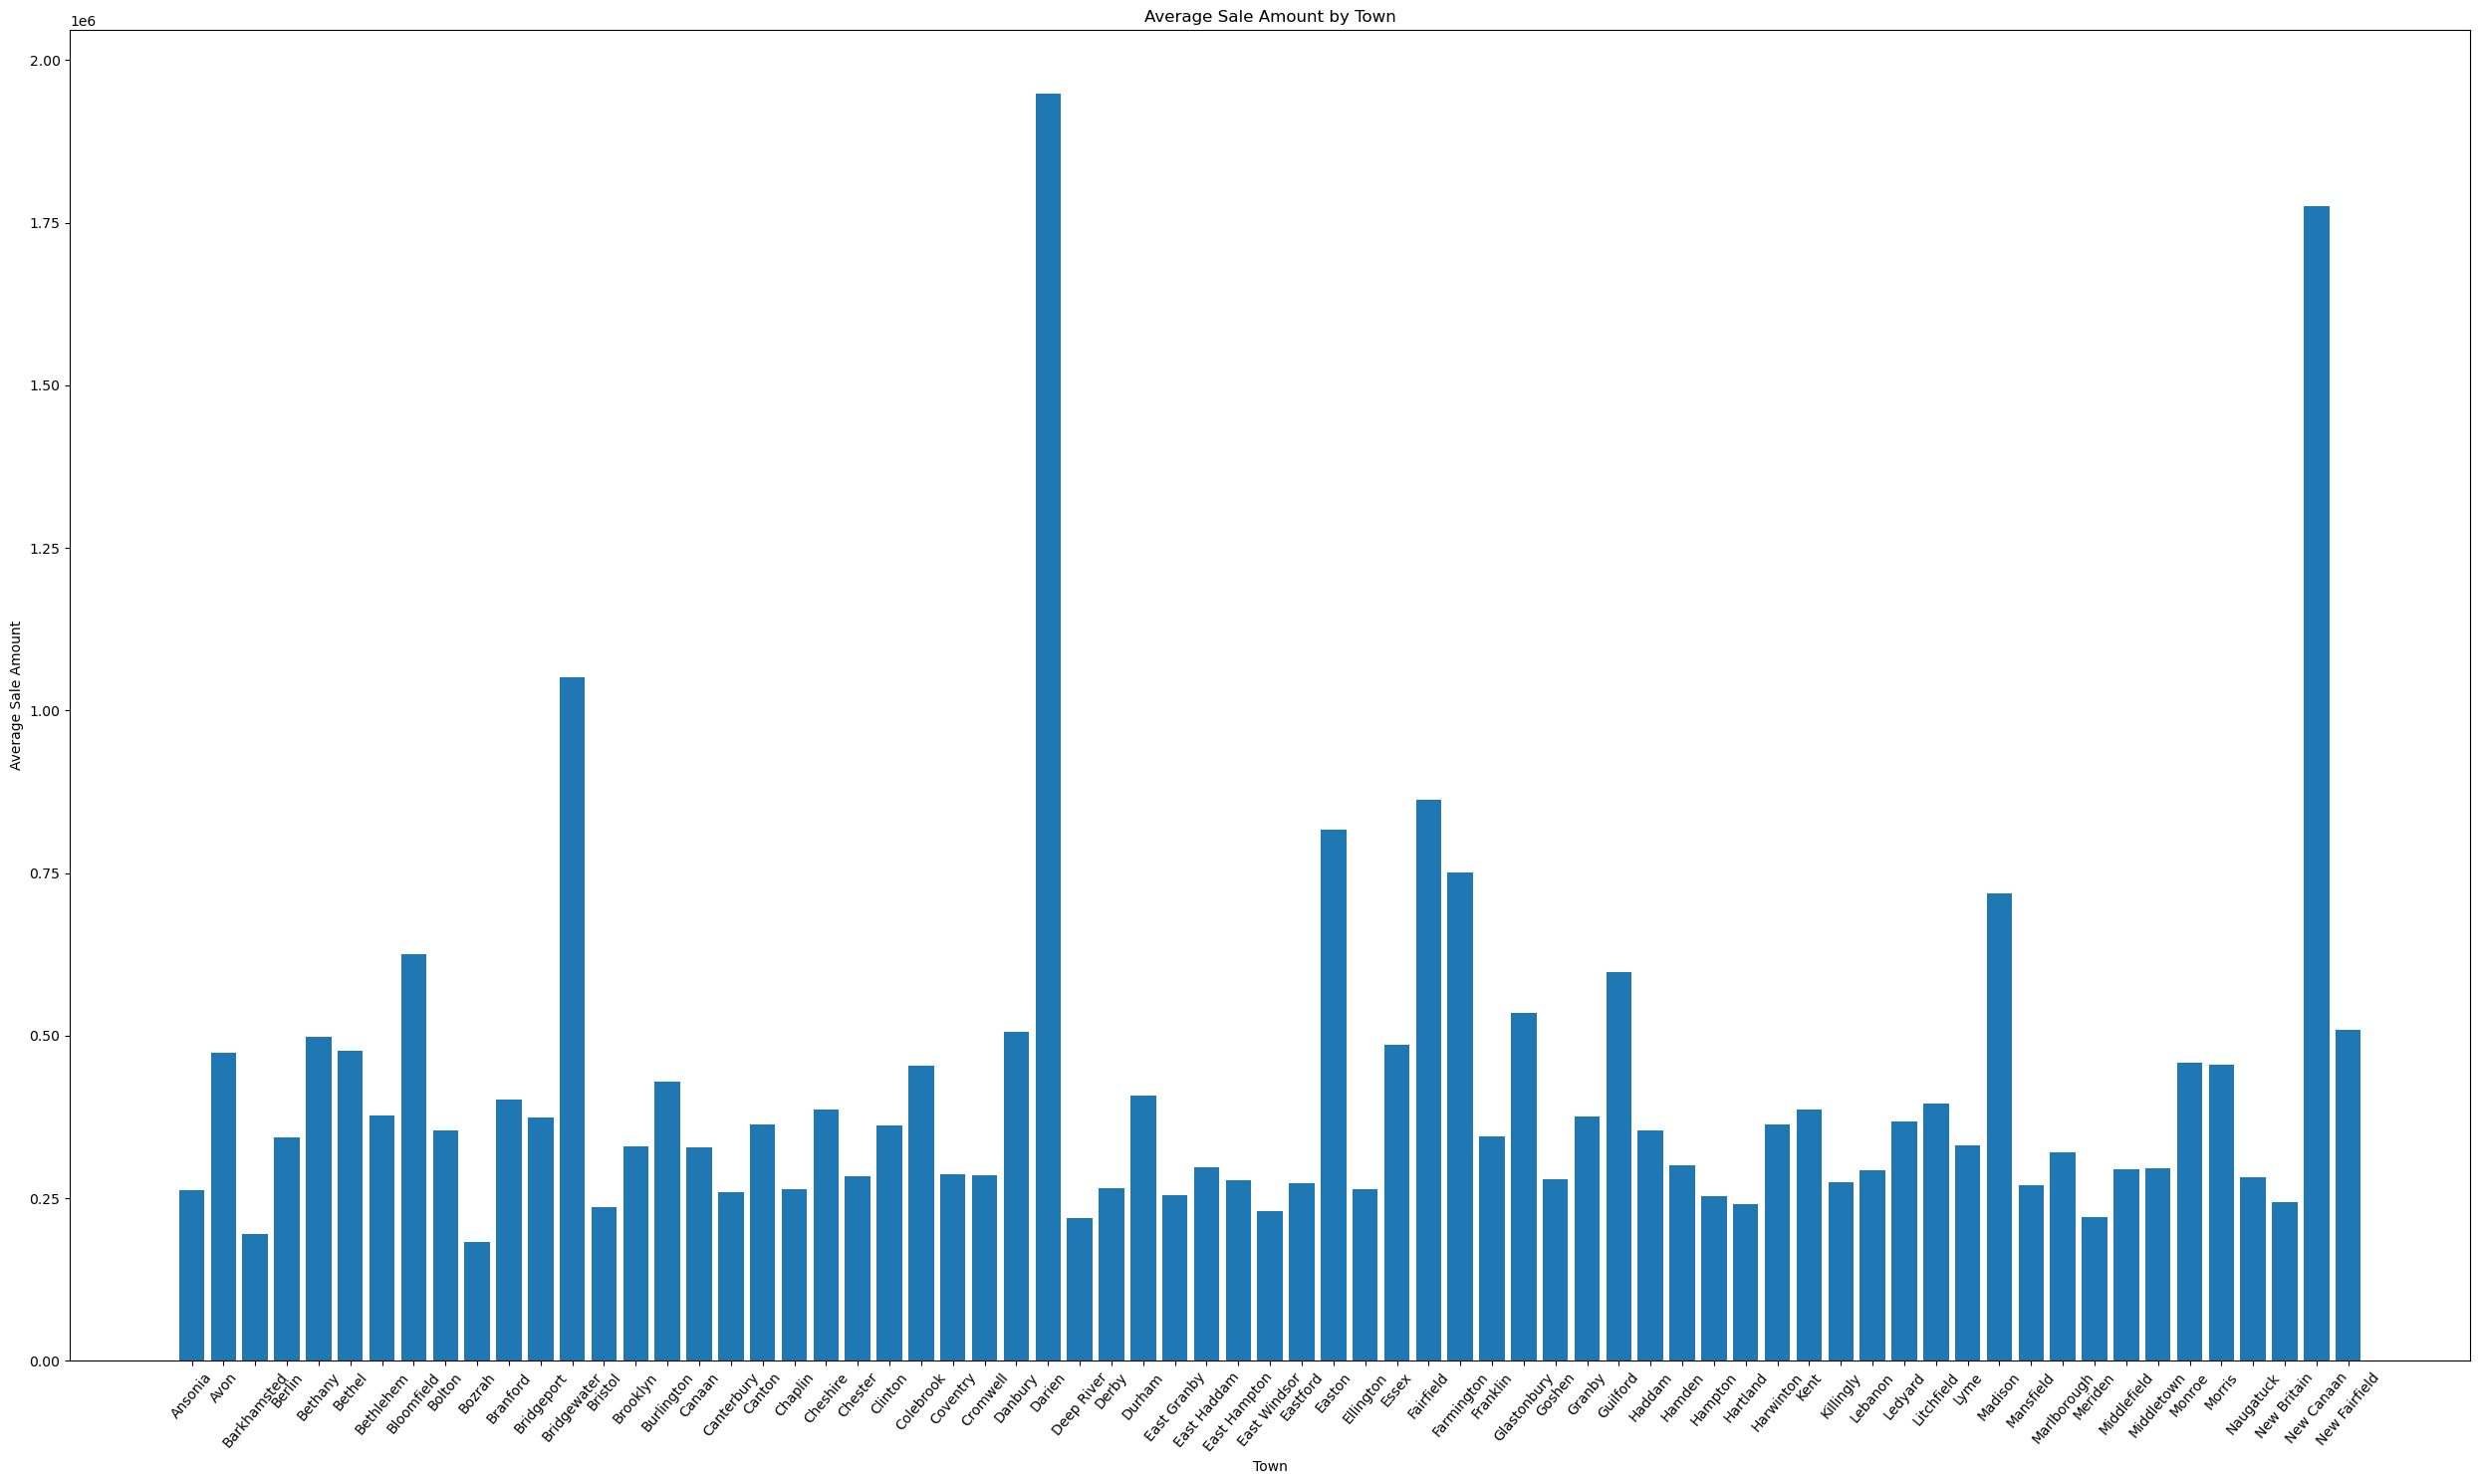

In [289]:
avg_by_town = df.groupby('Town')['Sale Amount'].mean()

plt.figure(figsize=(25, 15))
plt.bar(avg_by_town.index, avg_by_town.values)

plt.xlabel('Town')
plt.ylabel('Average Sale Amount')
plt.title('Average Sale Amount by Town')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

Create a scatter plot to visualize the relationship between Assessed Value and Sale Amount using Matplotlib.

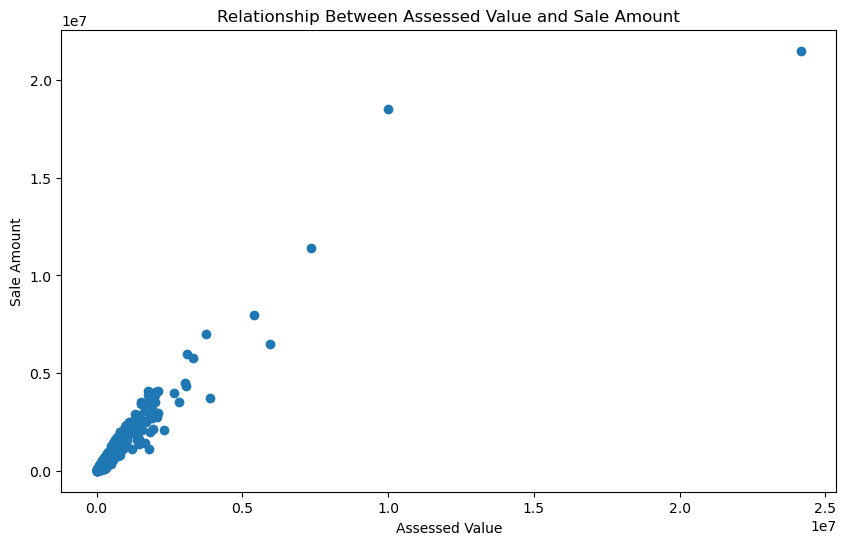

In [292]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Assessed Value'], df['Sale Amount'])

plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.title('Relationship Between Assessed Value and Sale Amount')
plt.show()

Apart from Matplotlib, the Seaborn library is also one of commonly used libraries to sketch graph. Create a box plot to compare the Sale Amount across different Residential Type categories using Seaborn.

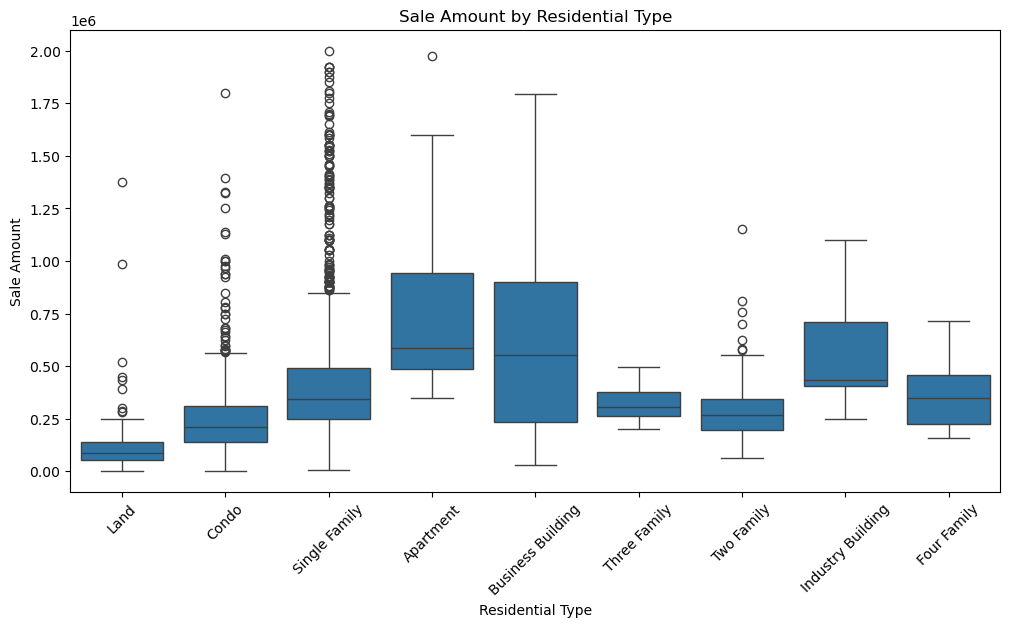

In [309]:
filtered_df = df[df['Sale Amount'] < 2_000_000]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Residential Type', y='Sale Amount')

plt.title('Sale Amount by Residential Type')
plt.xlabel('Residential Type')
plt.ylabel('Sale Amount')
plt.xticks(rotation=45)
plt.show()

Using loop and string manipulation, count, how many of the houses are placed on "BOULEVARD". You need to extract that word from address.

In [311]:
df["Address"].str.contains('BOULEVARD').value_counts()


Address
False    2462
True        7
Name: count, dtype: int64

Summaize your data with group-by with respect to Property type and Sale Amount average. Next, sort it in descending form.

In [321]:
average_house_price_des = df.groupby('Property Type').agg(
    avrg_price=('Sale Amount', 'mean')
).sort_values(by='avrg_price', ascending=True)

pd.set_option('display.float_format', '{:,.0f}'.format)

print(average_house_price_des)

               avrg_price
Property Type            
Vacant Land       216,638
Residential       436,023
Industrial        554,444
Commercial      1,400,683
Apartments      2,182,222


Create a pie chart with all necessary information on it which shows the portion for each of  Property Type sold.

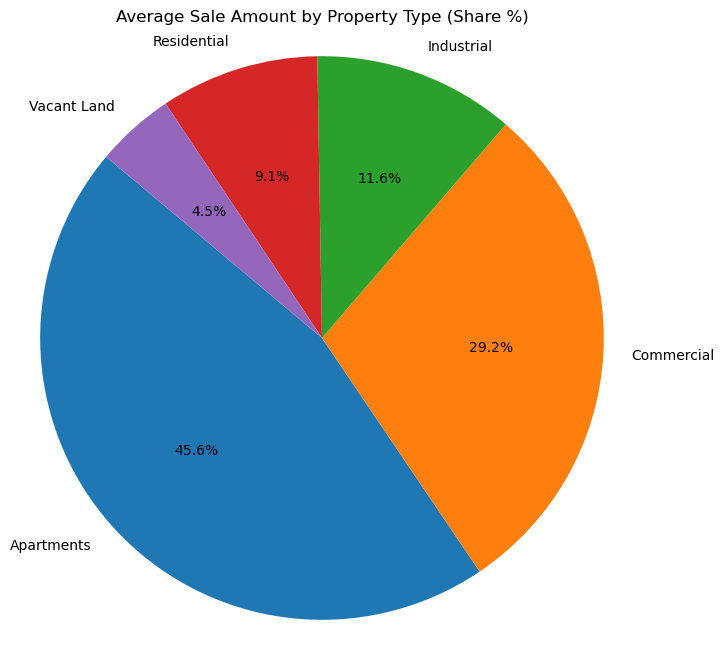

In [333]:
avg_by_type = df.groupby('Property Type')['Sale Amount'].mean()

plt.figure(figsize=(8, 8))
plt.pie(avg_by_type, labels=avg_by_type.index, autopct='%1.1f%%', startangle=140)

plt.title('Average Sale Amount by Property Type (Share %)')
plt.axis('equal') 
plt.show()

Ask from user City name and Maxmimum house price they can afford. Next, filter your data accordingly and print affordable houses in the mentioned city for the user. Use City name and Sale Amount for reference.

In [341]:
city = input("Please enter the city:")
price = float(input("Please enter the maximum house price: "))

filtered_df = df[
    df['Town'].str.contains(city, case=False, na=False) &
    (df['Sale Amount'] <= price)
]

print(filtered_df)

Please enter the city: Canaan
Please enter the maximum house price:  1000000


            Town                     Address  Assessed Value  Sale Amount  \
0         Canaan             0 ASPEN HILL DR          183800       220395   
84        Canaan              102 JOHNSON RD          345400       755000   
206       Canaan              114 JOHNSON RD          201000       132815   
285   New Canaan        123 RICHMOND HILL-#3          570220       806000   
327   New Canaan               13 CHARLES PL          376530       795000   
526   New Canaan               158 FOREST ST          551390       820000   
645   New Canaan         176 SUMMER ST-#176B          330680       750000   
657   New Canaan             179 PARK ST-#12          587230       975000   
677   New Canaan        181 RICHMOND HILL RD          583240       900000   
1155  New Canaan      289 NEW NORWALK RD-#22          581490      1000000   
1367  New Canaan  34 HERITAGE HILL RD-UNIT C          569520       940000   
2022      Canaan                66 BARNES RD          145500       203000   

Identify the top 5 most expensive streets by calculating the average sale amount for each street.

In [349]:
df['StreetOnly'] = df['Address'].str.extract('([A-Za-z\s]+)', expand=False).str.strip()

top_five_expensive_streets = df.groupby('StreetOnly').agg(
    avrg_price=('Sale Amount', 'mean')
).sort_values(by='avrg_price', ascending=False).head(5)

pd.set_option('display.float_format', '{:,.0f}'.format)

print(top_five_expensive_streets)


                  avrg_price
StreetOnly                  
FARM SPRINGS RD   21,500,000
KRISTINS WAY      18,500,000
MANCHESTER RD     11,393,647
OLD RIDGEBURY RD   7,957,000
BRUSH ISLAND RD    6,000,333


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/4l/qrhpvhyj78b2ll5k61pyppb80000gn/T/ipykernel_3240/1816251540.py:1: SyntaxWarning: invalid escape sequence '\s'
  df['StreetOnly'] = df['Address'].str.extract('([A-Za-z\s]+)', expand=False).str.strip()


Visualize how house prices are distributed across all sales.

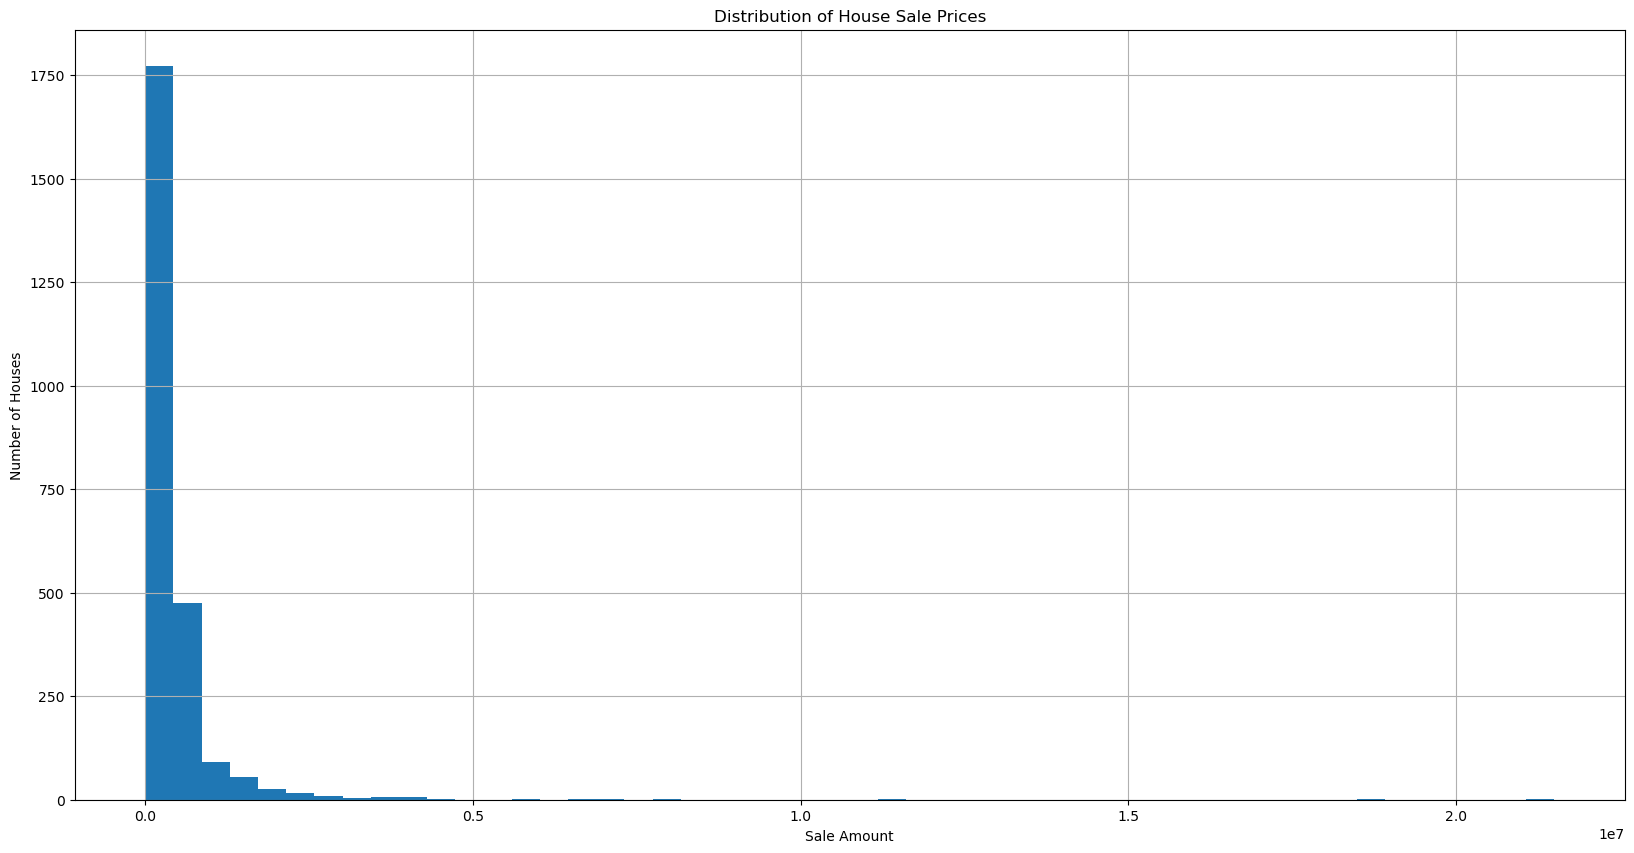

In [364]:

plt.figure(figsize=(20, 10))
plt.hist(df['Sale Amount'], bins=50)

plt.title('Distribution of House Sale Prices')
plt.xlabel('Sale Amount')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()

**Acknowledgement Note**

This project was developed during the Algorithmic Thinking with Math, Python and Real World Applications course. Special thanks to Dr. Bektur Abdisatarov and Salizhan Kylychbekov for their invaluable contributions and guidance throughout the course. Their expertise and support were instrumental in the successful completion of this project.

In [ ]:
Thank you very much!!!